# Модуль формирования концептуальных карт на основе анализа текста для русского языка


## Требования к функциональным характеристикам модуля.

Разрабатываемая система должна выполнять следующие функции:

    5.2.1. Обработка входного текста.

    5.2.2. Разбиение текста на предложения.

    5.2.3.  Выделение глагольных конструкций из предложений.

    5.2.4. Выделение именных конструкций из предложений.

    5.2.5. Составление триплетов вида “концепт-отношение-концепт” для каждого предложения, которое отражает главную суть предложения.

    5.2.6. Лемматизация триплетов вида “концепт-отношение-концепт”.

    5.2.7. Визуализация предложений на основе dependency меток слов.

    5.2.8. Составление и визуализация концептуальной карты, на основе полученных триплетов.

In [33]:
import import_ipynb
from dip_lib import *

**Первый пункт ПМИ - Запуск очистки текста**

In [34]:
text = 'Маша и Саша сидели на трубе. #Мой друг Иван живет в городе Москва. Мама пошла в новый магазин. Мама купила овощей, фруктов и ягод. #В машине громко играет музыка.https://sites.google.com/site/oksumorontv/%D0%B2%D0%BA%D1%80'
test = text_treatment(text)
test.clean()
clean_text = test.text
print(clean_text)

Маша и Саша сидели на трубе. Мой друг Иван живет в городе Москва. Мама пошла в новый магазин. Мама купила овощей, фруктов и ягод. В машине громко играет музыка.


**Второй пункт ПМИ - Запуск разбиения текста на предложения**

In [35]:
test_2 = text_treatment(text)
test_2.clean()
test_2.sentences()
sentences = test_2.clean_sent
print(sentences)

['Маша и Саша сидели на трубе', 'Мой друг Иван живет в городе Москва', 'Мама пошла в новый магазин', 'Мама купила овощей, фруктов и ягод', 'В машине громко играет музыка.']


**Третий пункт ПМИ - Выделение глагольных конструкций из полученных предложений**

In [36]:
test_3 = text_triplets(sentences)
for sentence in sentences:
    sentence = nlp(sentence)
    vbs = test_3.get_verb_phrases(sentence)
    new_vbs = test_3.longer_verb_phrase(vbs)
    print(new_vbs)

сидели на
живет в
пошла в
купила
громко играет


**Четвертый пункт ПМИ - Выделение именных конструкций из полученных предложений.**

In [37]:
test_4 = text_triplets(sentences)
for sentence in sentences:
    sentence = nlp(sentence)
    nph = test_4.find_noun_phrases(sentence)
    new_nph = test_4.longer_noun_phrase(nph)
    print(new_nph)

[Маша, Саша, трубе]
[Мой друг Иван, городе Москва]
[Мама, новый магазин]
[Мама, овощей, фруктов, ягод]
[машине, музыка]


**Пятый пункт ПМИ - Составить на основе выделенных именных и глагольных конструкций триплеты вида “концепт-отношение-концепт”, которые отражают главную суть каждого предложения в тексте.**

In [38]:
test_5 = text_triplets(sentences)
for sentence in sentences:
    (a,b,c) = test_5.find_triplet(sentence)
    print(a, "\t", b, "\t", c)

[Маша, Саша] 	 сидели на 	 [трубе]
Мой друг Иван 	 живет в 	 городе Москва
Мама 	 пошла в 	 новый магазин
[Мама] 	 купила 	 [овощей, фруктов, ягод]
машине 	 громко играет 	 музыка


In [39]:
test_6 = text_triplets(sentences)
test_6.triplets_array()
edges = test_6.edges_2 
labels = test_6.verbp_2
print(edges)
print(labels)

[[Маша, трубе], [Саша, трубе], [Мой друг Иван, городе Москва], [Мама, новый магазин], [Мама, овощей], [Мама, фруктов], [Мама, ягод], [машине, музыка]]
[сидели на, сидели на, живет в, пошла в, купила, купила, купила, громко играет]


**Шестой пункт ПМИ - Лемматизация триплетов “концепт-отношение-концепт”.**

In [40]:
test_7 = text_triplets(sentences)
test_7.triplets_array()
test_7.lemmatize()
edges = test_7.edges_2
labes = test_7.verbp_2
print(edges)
print(labels)

[['маша', 'труба'], ['саша', 'труба'], ['мой друг иван', 'город москва'], ['мама', 'новый магазин'], ['мама', 'овощ'], ['мама', 'фрукт'], ['мама', 'ягода'], ['машина', 'музыка']]
[сидели на, сидели на, живет в, пошла в, купила, купила, купила, громко играет]


**Седьмой пункт ПМИ - Визуализация предложений на основе dependency меток слов.**

In [41]:
test_8 = text_triplets(sentences)
test_8.displacy_show()

**Восьмой пункт ПМИ - Составление и визуализация концептуальной карты, на основе полученных триплетов.**

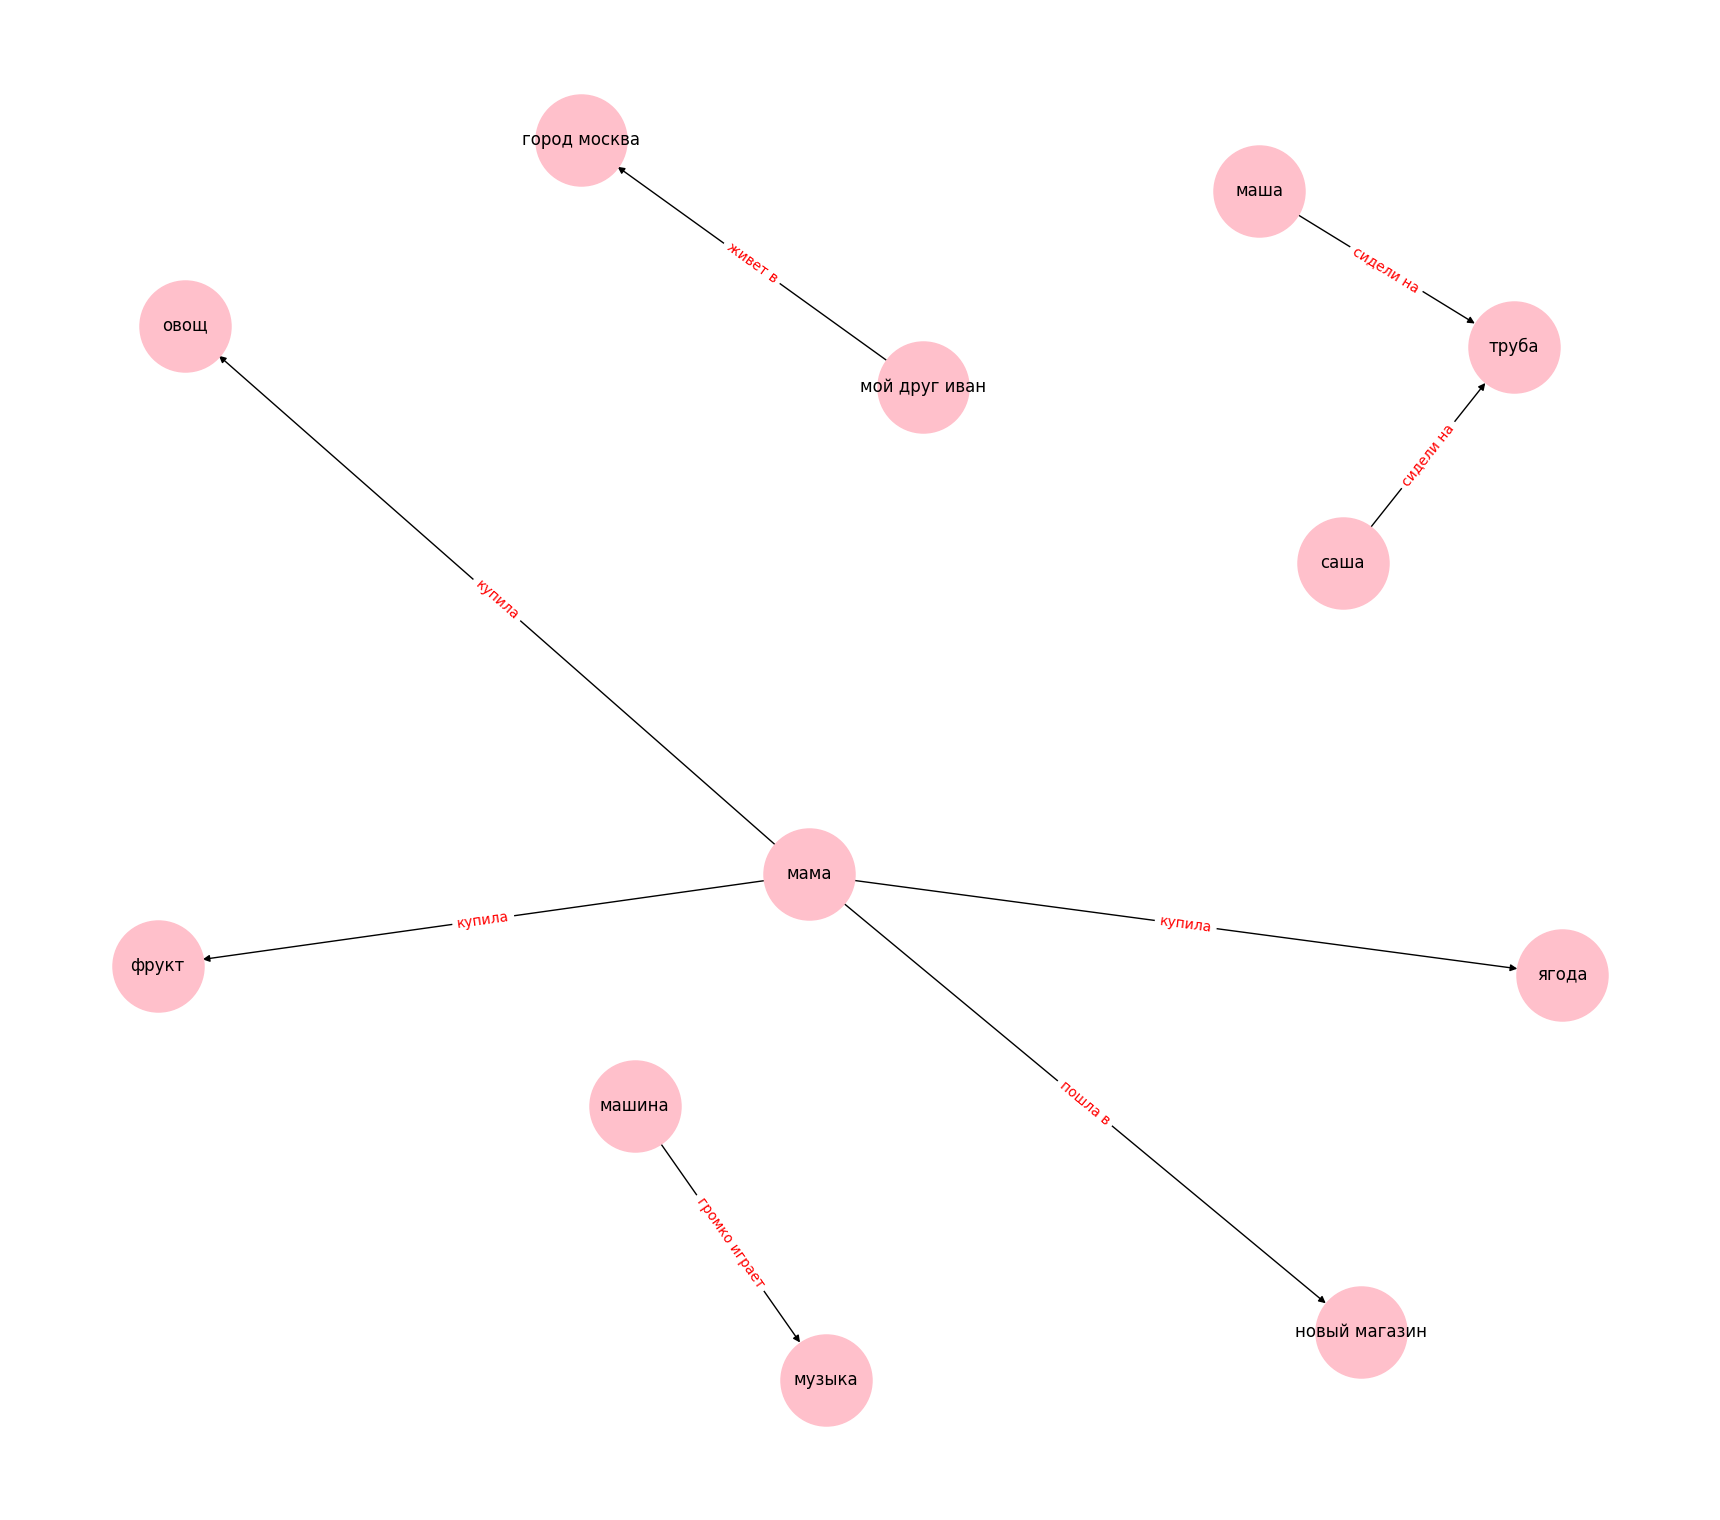

In [42]:
call_3 = visualizer(edges, labels)
call_3.edge_labels_create()
call_3.visualize()